In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from nfoursid.kalman import Kalman
from nfoursid.nfoursid import NFourSID
from nfoursid.state_space import StateSpace

_ = np.seterr(all="ignore")
pd.set_option('display.max_columns', None)
np.random.seed(2)

In [216]:
NUM_TRAINING_DATAPOINTS = 5000  # create a training-set by simulating a state-space model with this many datapoints
NUM_TEST_DATAPOINTS = 20  # same for the test-set
INPUT_DIM = 3
OUTPUT_DIM = 2
INTERNAL_STATE_DIM = 4  # actual order of the state-space model in the training- and test-set
NOISE_AMPLITUDE = .05  # add noise to the training- and test-set

# define system matrices for the state-space model of the training- and test-set
A = np.array([
    [1,  .01,    0,   0],
    [0,    1,  .01,   0],
    [0,    0,    1, .02],
    [0, -.01,    0,   1],
]) / 1.1
B = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [0, 1, 1],
]
) / 3
C = np.array([
    [1, 0, 1,  1],
    [0, 0, 1, -1],
])
D = np.array([
    [1, 0, 1],
    [0, 1, 0]
]) / 10

In [217]:
state_space = StateSpace(A, B, C, D)
for _ in range(NUM_TRAINING_DATAPOINTS):
    input_state = np.random.standard_normal((INPUT_DIM, 1))
    noise = np.random.standard_normal((OUTPUT_DIM, 1)) * NOISE_AMPLITUDE

    state_space.step(input_state, noise)

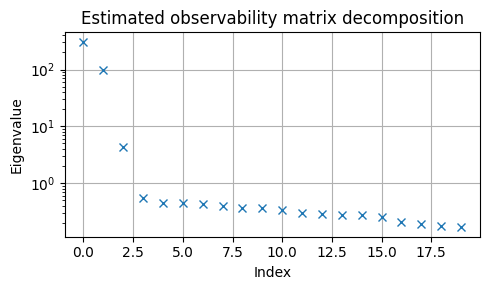

In [219]:
nfoursid = NFourSID(
    state_space.to_dataframe(),  # the state-space model can summarize inputs and outputs as a dataframe
    output_columns=state_space.y_column_names,
    input_columns=state_space.u_column_names,
    num_block_rows=10
)
nfoursid.subspace_identification()

fig, ax = plt.subplots(figsize=(5, 3))
nfoursid.plot_eigenvalues(ax)
fig.tight_layout()

In [220]:
nfoursid = NFourSID(
    state_space.to_dataframe(),  # the state-space model can summarize inputs and outputs as a dataframe
    output_columns=state_space.y_column_names,
    input_columns=state_space.u_column_names,
    num_block_rows=10
)
nfoursid.subspace_identification()

In [221]:
ORDER_OF_MODEL_TO_FIT = 4
state_space_identified, covariance_matrix = nfoursid.system_identification(
    rank=ORDER_OF_MODEL_TO_FIT
)

In [204]:
np.linalg.norm(state_space_identified.a - A)

np.float64(0.2881138396299479)

/Users/pantelis/Documents/Development/filteringLab/.venv/lib/python3.13/site-packages/nfoursid/kalman.py:246: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  }).applymap(lambda array: array[0])
/Users/pantelis/Documents/Development/filteringLab/.venv/lib/python3.13/site-packages/nfoursid/kalman.py:246: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  }).applymap(lambda array: array[0])


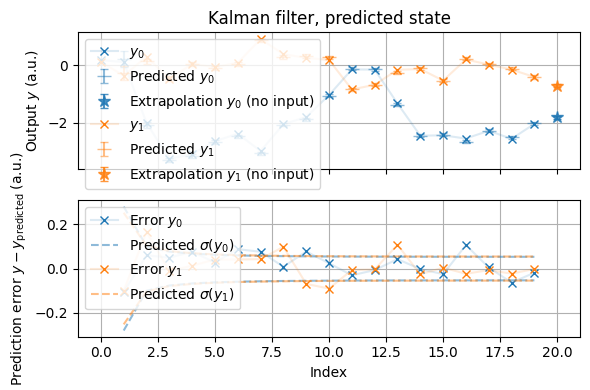

In [214]:
kalman = Kalman(state_space_identified, covariance_matrix)
state_space = StateSpace(A, B, C, D)  # new data for the test-set
for _ in range(NUM_TEST_DATAPOINTS):  # make a test-set
    input_state = np.random.standard_normal((INPUT_DIM, 1))
    noise = np.random.standard_normal((OUTPUT_DIM, 1)) * NOISE_AMPLITUDE
    y = state_space.step(input_state, noise)  # generate test-set
    kalman.step(y, input_state)


fig = plt.figure(figsize=(6, 4))
kalman.plot_predicted(fig)
fig.tight_layout()

In [215]:
kalman.to_dataframe()

/Users/pantelis/Documents/Development/filteringLab/.venv/lib/python3.13/site-packages/nfoursid/kalman.py:246: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  }).applymap(lambda array: array[0])
/Users/pantelis/Documents/Development/filteringLab/.venv/lib/python3.13/site-packages/nfoursid/kalman.py:246: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  }).applymap(lambda array: array[0])


$y_0$                                                         \
      actual  filtered                    next predicted (no input)   
      output    output standard deviation                    output   
0   0.175903  0.175898           0.073115                  0.454764   
1   0.106227  0.109009           0.072417                 -1.656435   
2  -2.005698 -2.018178           0.068012                 -3.394874   
3  -3.252027 -3.274965           0.064172                 -3.212649   
4  -3.087640 -3.132703           0.061254                 -2.700946   
5  -2.637557 -2.655252           0.059075                 -2.345839   
6  -2.382227 -2.448077           0.057450                 -3.145018   
7  -2.981730 -3.042603           0.056236                 -1.987389   
8  -2.052468 -2.057283           0.055331                 -1.965566   
9  -1.799270 -1.868749           0.054657                 -1.016111   
10 -1.038979 -1.062396           0.054159                 -0.170724   
11 -0.147547 -0.119620           0.053793                  0.103823   
12 -0.153659 -0.147507           0.053528                 -1.180424   
13 -1.329688 -1.367790           0.053337                 -2.292946   
14 -2.449233 -2.447699           0.053202                 -2.439786   
15 -2.435459 -2.411649           0.053107                 -2.688914   
16 -2.548375 -2.649026           0.053040                 -2.124377   
17 -2.275823 -2.280633           0.052995                 -2.604869   
18 -2.558783 -2.498992           0.052964                 -1.988493   
19 -2.037956 -2.020146           0.052942                 -1.812513   

                                                                           \
                      next predicted (input corrected)                      
   standard deviation                           output standard deviation   
0            0.279201                         0.212157           0.279201   
1            0.099986                        -2.065750           0.099986   
2            0.076453                        -3.301019           0.076453   
3            0.067058                        -3.163602           0.067058   
4            0.062115                        -2.664833           0.062115   
5            0.059150                        -2.469623           0.059150   
6            0.057237                        -3.057467           0.057237   
7            0.055948                        -2.060856           0.055948   
8            0.055056                        -1.876198           0.055056   
9            0.054430                        -1.062996           0.054430   
10           0.053987                        -0.117028           0.053987   
11           0.053675                        -0.146976           0.053675   
12           0.053455                        -1.372041           0.053455   
13           0.053301                        -2.447215           0.053301   
14           0.053193                        -2.410348           0.053193   
15           0.053119                        -2.654142           0.053119   
16           0.053069                        -2.280785           0.053069   
17           0.053034                        -2.495622           0.053034   
18           0.053011                        -2.019232           0.053011   
19           0.052995                              NaN           0.052995   

       $y_1$                                                         \
      actual  filtered                    next predicted (no input)   
      output    output standard deviation                    output   
0   0.114839  0.114832           0.075024                 -0.168703   
1  -0.366361 -0.362888           0.074083                  0.000251   
2   0.292584  0.249694           0.069829                 -0.347099   
3  -0.474488 -0.468156           0.065968                  0.026237   
4   0.044706  0.039533           0.062972                 -0.029362   
5  -0.068024 -0.095363           